In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


from os.path import join
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical

In [2]:
tf.config.run_functions_eagerly(False)
print(tf.executing_eagerly())

True


In [3]:
tf.__version__

'2.4.0-rc0'

In [4]:
datax = np.load(join("data",'MNIST.npy'))
datay = np.load(join("data",'Label.npy'))

In [5]:
datax_norm = datax/255.0

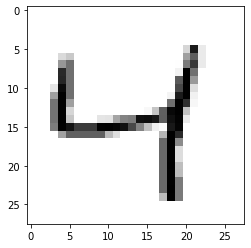

In [6]:
plt.imshow(datax_norm[2],cmap='Greys')

In [7]:
datax_re = datax_norm.reshape([-1,datax_norm.shape[1]**2])

In [8]:
datax_re.shape

(60000, 784)

In [9]:
input_shape = (datax_re.shape[1],)
input_tensor = layers.Input(input_shape)

In [10]:
##encoder
e1 = layers.Dense(500 , activation='relu')(input_tensor)
e2 = layers.Dense(300 , activation='relu')(e1)
e3 = layers.Dense(100 , activation='relu')(e2)
e4 = layers.Dense(50 , activation='relu',name='la_layer')(e3)

latent_tensor = e4

#decoder

d1 = layers.Dense(100 , activation='relu')(latent_tensor)
d2 = layers.Dense(300 , activation='relu')(d1)
d3 = layers.Dense(500 , activation='relu')(d2)


reconstruct_output = layers.Dense(datax_re.shape[1] , activation='relu')(d3)



In [11]:
ae = models.Model(input_tensor , reconstruct_output)
ae.compile(optimizer='adam' , loss='mse')

In [12]:
ae.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
la_layer (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_4 (Dense)              (None, 300)               30300 

In [13]:
epoch = 10
batch_size=64



In [14]:
#ae.fit(datax_re , datax_re , batch_size=batch_size , epochs=epoch)

In [15]:
decode_img = ae.predict(datax_re[2].reshape(1,28*28))

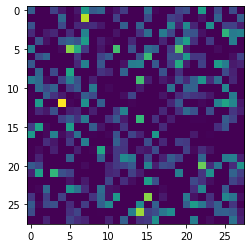

In [16]:
plt.imshow(decode_img.reshape(28,28))

In [17]:
r_vec = np.random.rand(784,1)

In [18]:
d_img = ae.predict(r_vec.reshape(1,28*28))
d_img = d_img.reshape(28,28)

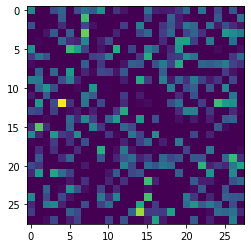

In [19]:
plt.imshow(d_img)

# Noise MAE

In [20]:
np.mean(np.abs(r_vec - d_img.reshape(784,1)))

0.4727456201279333

# CAE

In [21]:
x_data = datax_norm.reshape((-1,28,28,1))

In [22]:
x_data.shape

(60000, 28, 28, 1)

In [23]:
ip_shape = x_data.shape[1:]
ip_tensor = layers.Input(ip_shape)

In [24]:
conv_1 = layers.Conv2D(1 , kernel_size=(5,5),strides=1, padding='same')(ip_tensor)
b_1 =layers.BatchNormalization()(conv_1)
act_1 = layers.Activation("relu")(b_1)
pool_1 = layers.MaxPool2D()(act_1)

conv_2 = layers.Conv2D(1 , kernel_size=(3,3),strides=1, padding='same')(pool_1)
b_2 =layers.BatchNormalization()(conv_2)
act_2 = layers.Activation("relu")(b_2)
pool_2 = layers.MaxPool2D(name = 'imlatent_layer')(act_2)


flatten = layers.Flatten()(pool_2)
dense1 = layers.Dense(32 , activation='relu' , name='latent_layer')(flatten)

latent_tensor = dense1


dense2 = layers.Dense(7*7,activation='relu')(latent_tensor)
reshaped = tf.reshape(dense2 , [-1,7,7,1])

#14,14
up2 = layers.UpSampling2D()(reshaped)
# 14,14
t2 = layers.Conv2DTranspose(1,(5,5),padding='same',activation='sigmoid')(up2)

# 28,28
up3 = layers.UpSampling2D()(t2)
t3 = layers.Conv2DTranspose(1,(5,5),padding='same',activation='sigmoid')(up3)


output_tensor = t3





















In [25]:
ae=models.Model(ip_tensor,output_tensor)
ae.compile(optimizer='adam',loss='mse')

In [26]:
ae.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 1)         26        
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
activation (Activation)      (None, 28, 28, 1)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 1)         10        
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 1)         4   

In [27]:
epoch=10
batch_size=32

ae.fit(x_data , x_data, batch_size=32,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1029
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0651
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0592
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0571
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0563
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0558
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0556
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0538
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0526
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0517


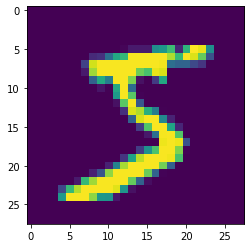

In [28]:
plt.imshow(x_data[0].reshape(28,28))

In [29]:
pre = ae.predict(x_data[0].reshape(1,28,28,1))
pre.shape

(1, 28, 28, 1)

In [30]:
pre = pre.reshape(28,28)

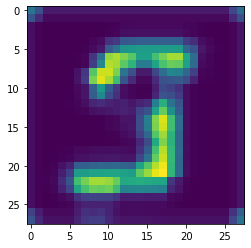

In [31]:
plt.imshow(pre)

In [33]:
check = models.Model(inputs = ae.input , 
                    outputs = ae.get_layer('imlatent_layer').output)


In [34]:
check_output = check.predict(x_data[0].reshape(1,28,28,1))

In [35]:
check_output = np.array(check_output)


In [36]:
check_output.shape

(1, 7, 7, 1)

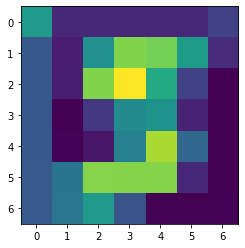

In [38]:
plt.imshow(check_output.reshape(7,7))